In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Data_Maize1/Train'
test_path = '/content/drive/MyDrive/Data_Maize1/Test'

In [ ]:
Vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in Vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(Vgg.output)
x1 = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0004))(x)
prediction = Dense(5, activation='softmax')(x1)

model = Model(inputs=Vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [ ]:
model_callbacks = [
                   EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10, mode="min", restore_best_weights=True),
                   ModelCheckpoint('/content/drive/MyDrive/models/model_VGG19_new.h5', monitor="val_loss",save_best_only=True,mode="min")
]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2,)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 subset='training',
                                                 class_mode = 'categorical')

Found 1637 images belonging to 5 classes.


In [ ]:
val_set = train_datagen.flow_from_directory(train_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            subset='validation',
                                            class_mode = 'categorical')

Found 409 images belonging to 5 classes.


In [ ]:
r = model.fit(
  training_set,steps_per_epoch=len(training_set),
  validation_data=val_set,validation_steps=len(val_set),
  epochs=100,
  callbacks=model_callbacks
)

Epoch 1/100
52/52 [==============================] - 666s 13s/step - loss: 2.5932 - accuracy: 0.4873 - val_loss: 0.5455 - val_accuracy: 0.8264
Epoch 2/100
52/52 [==============================] - 82s 2s/step - loss: 0.3765 - accuracy: 0.8842 - val_loss: 0.3766 - val_accuracy: 0.8949
Epoch 3/100
52/52 [==============================] - 81s 2s/step - loss: 0.1849 - accuracy: 0.9739 - val_loss: 0.3645 - val_accuracy: 0.8900
Epoch 4/100
52/52 [==============================] - 81s 2s/step - loss: 0.1472 - accuracy: 0.9829 - val_loss: 0.5077 - val_accuracy: 0.8411
Epoch 5/100
52/52 [==============================] - 80s 2s/step - loss: 0.1233 - accuracy: 0.9826 - val_loss: 0.3774 - val_accuracy: 0.8949
Epoch 6/100
52/52 [==============================] - 80s 2s/step - loss: 0.0876 - accuracy: 0.9979 - val_loss: 0.5567 - val_accuracy: 0.8460
Epoch 7/100
52/52 [==============================] - 80s 2s/step - loss: 0.1197 - accuracy: 0.9755 - val_loss: 0.4166 - val_accuracy: 0.8655
Epoch 8/100

In [ ]:
import matplotlib.pyplot as plt

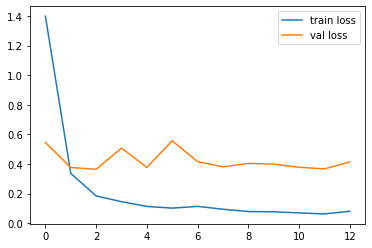

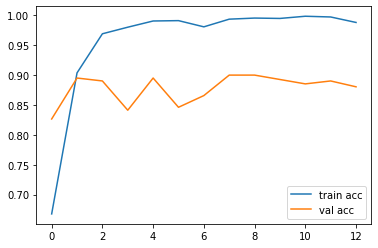

<Figure size 432x288 with 0 Axes>

In [ ]:
#loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/LossVal_loss')

#accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/models/model_vgg_new_l.h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32)

Found 500 images belonging to 5 classes.


In [ ]:
y_pred = model.evaluate(test_set)

16/16 [==============================] - 171s 11s/step - loss: 0.6690 - accuracy: 0.7880


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model1=load_model('/content/drive/MyDrive/models/model_VGG19_new.h5')

In [ ]:
y_pred1 = model1.evaluate(test_set)

In [ ]:
img=image.load_img('/content/drive/MyDrive/Data_Maize1/Test/Blight/Corn_Blight (401).JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
import numpy as np
x=x/255
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
p = model1.predict(x)
#print(np.round_(p))
print((p))

[[9.6145552e-01 4.0661232e-03 1.4705738e-02 1.3841697e-04 1.9634135e-02]]


In [ ]:
p = np.argmax(p, axis=1)
p

array([0])